In [1]:
#Importar librerías
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Función para mostrar imágen
def show_image(img):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img, cmap='gray')
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

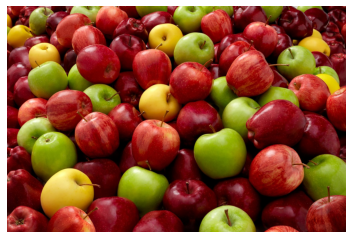

In [2]:
# Cargar imágen
img = cv2.imread('manzanitas.jpg', 1)
# Convertir a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

show_image(img_rgb)

## Selección de espacio de color

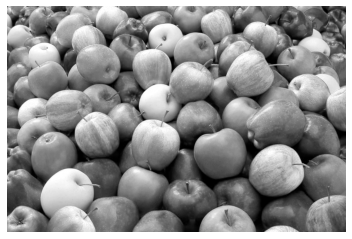

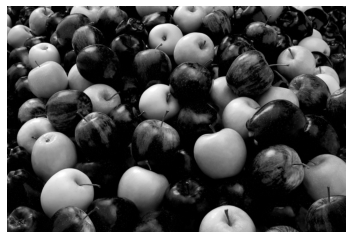

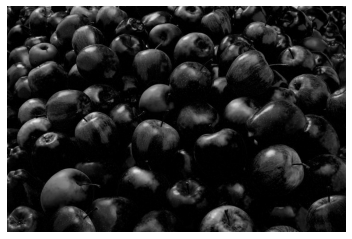

In [5]:
# Separar canales
img_r = img_rgb[:, : , 0]
img_g = img_rgb[:, : , 1]  
img_b = img_rgb[:, : , 2] 

show_image(img_r)
show_image(img_g)
show_image(img_b)

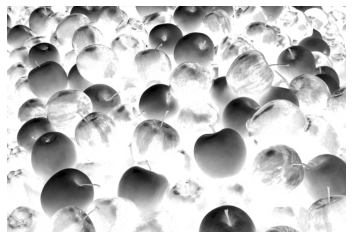

In [6]:
# Ver el negativo de la imagen en el canal verde
img_neg_b =cv2.bitwise_not(img_g)

show_image(img_neg_b)

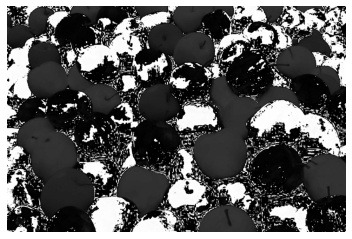

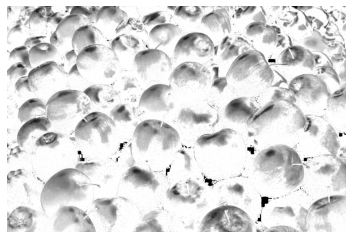

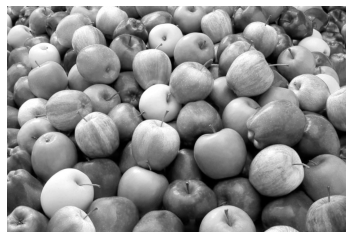

In [8]:
# Convertir imagen a HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_h = img_hsv[:, : , 0]
img_s = img_hsv[:, : , 1]  
img_v = img_hsv[:, : , 2] 

show_image(img_h)
show_image(img_s)
show_image(img_v)

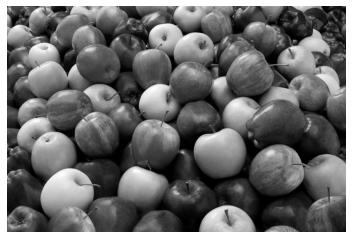

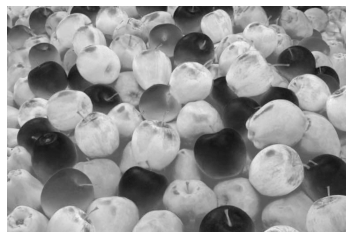

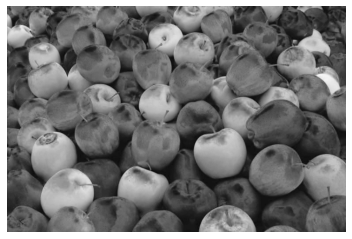

In [11]:
# Convertir la imagen a LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

img_l = img_lab[:, : , 0]
img_a = img_lab[:, : , 1]  
img_b = img_lab[:, : , 2] 

show_image(img_l)
show_image(img_a)
show_image(img_b)

Se selecciona el espacio de color LAB al observar que separa de mejor manera las manzanas.

## Segmentación

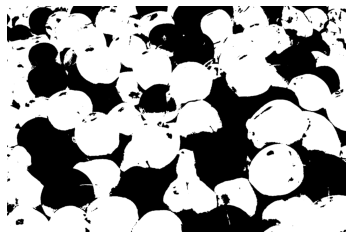

In [12]:
_, thresh_1 = cv2.threshold(img_a, 150, 255, cv2.THRESH_BINARY)

show_image(thresh_1)

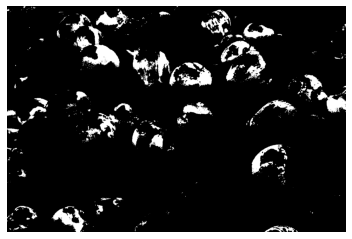

In [ ]:
_, thresh_2 = cv2.threshold(img_a, 180, 255, cv2.THRESH_BINARY)

show_image(thresh2)

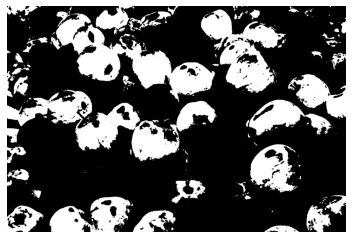

In [ ]:
_, thresh_3 = cv2.threshold(img_a, 170, 255, cv2.THRESH_BINARY)

show_image(thresh_3)

## Morfología

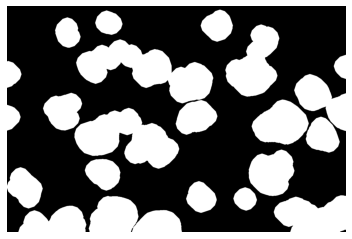

In [23]:
import skimage.morphology as morph
# Aplicar operaciones morfológicas

# Kernel de disco
kernel = morph.disk(7)

# Aplicar apertura
apertura = cv2.morphologyEx(thresh_1, cv2.MORPH_OPEN, kernel, iterations = 7)

show_image(apertura)

## Detección de objetos

### Dibujar bounding box en los contornos

22


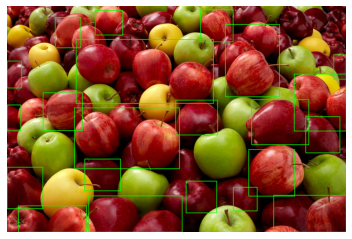

In [20]:
img = cv2.imread('manzanitas.jpg', 1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# find contours
contours, hierarchy = cv2.findContours(apertura.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Mostrar el numero de contornos encontrados
print(len(contours)) 
# Recorro todos los contornos encontrados
for c in contours:
    x,y,w,h = cv2.boundingRect(c) # Encuentro el rectángulo que engloba al contorno
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2) # Dibujo el rectángulo en la imagen original

    

show_image(img_rgb)

### Aplicación de la máscara

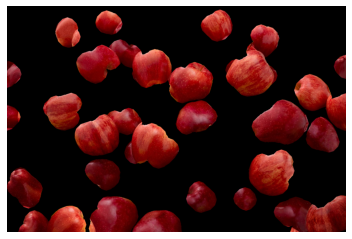

In [22]:
img = cv2.imread('manzanitas.jpg', 1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Se convierte la mascara en rgb o a color para poder implementarla en la imagen original
apertura_rgb = cv2.cvtColor(apertura, cv2.COLOR_GRAY2RGB)
# Se aplica la mascara a la imagen original
R = cv2.bitwise_and(img_rgb, apertura_rgb)

show_image(R)